In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap, BoundaryNorm

# Reading the Raw File

In [3]:
# Create custom colour map

boundaries = list(range(0,20))
colours = [
    ('Background', (0, 0, 0)),
    ('Meadow', (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)),
    ('Soft winter wheat', (1.0, 0.4980392156862745, 0.054901960784313725)),
    ('Corn', (1.0, 0.7333333333333333, 0.47058823529411764)),
    ('Winter barley', (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)),
    ('Winter rapeseed', (0.596078431372549, 0.8745098039215686, 0.5411764705882353)),
    ('Spring barley', (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)),
    ('Sunflower', (1.0, 0.596078431372549, 0.5882352941176471)),
    ('Grapevine', (0.5803921568627451, 0.403921568627451, 0.7411764705882353)),
    ('Beet', (0.7725490196078432, 0.6901960784313725, 0.8352941176470589)),
    ('Winter triticale', (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)),
    ('Winter durum wheat', (0.7686274509803922, 0.611764705882353, 0.5803921568627451)),
    ('Fruits, vegetables, flowers', (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)),
    ('Potatoes', (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)),
    ('Leguminous fodder', (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)),
    ('Soybeans', (0.7803921568627451, 0.7803921568627451, 0.7803921568627451)),
    ('Orchard', (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)),
    ('Mixed cereal', (0.8588235294117647, 0.8588235294117647, 0.5529411764705883)),
    ('Sorghum', (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)),
    ('Void label', (1, 1, 1)),
]

custom_cmap = ListedColormap([colour for _, colour in colours])
boundary_norm = BoundaryNorm(boundaries, len(colours) + 1)

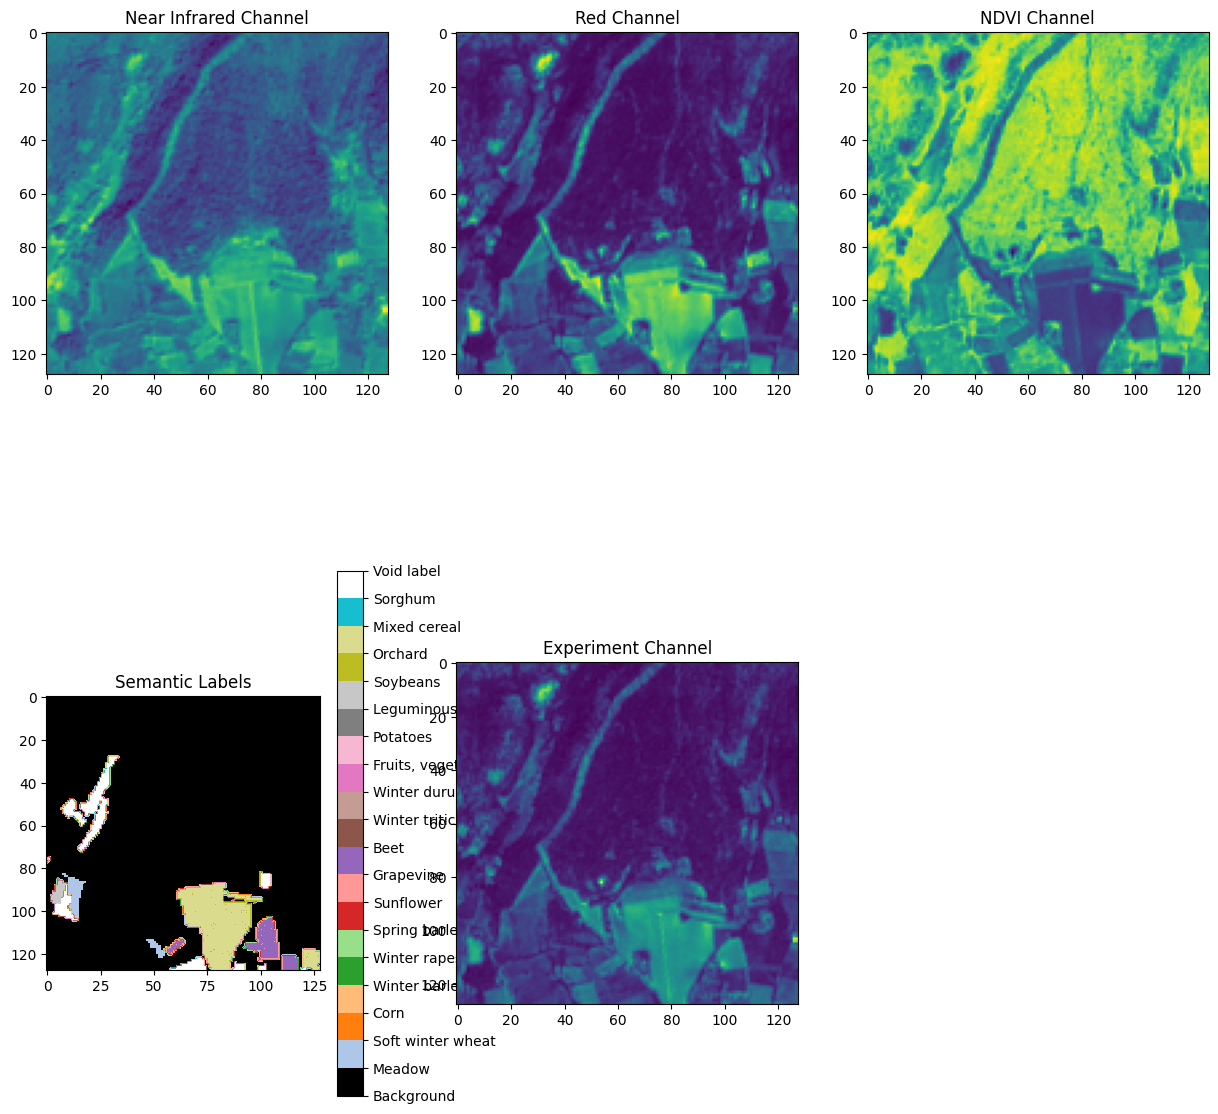

In [4]:
PATH = '/home/narvjes/data/PASTIS/DATA_S2'
SEMANTIC_LABEL_PATH = '/home/narvjes/data/PASTIS/ANNOTATIONS'
IMAGE_INPUT = 'S2_20549.npy'

patch_id = IMAGE_INPUT.replace('S2_', '').replace('.npy', '')
near_infrared_channel = np.load(os.path.join(PATH, IMAGE_INPUT))[0,6,:,:]
red_channel = np.load(os.path.join(PATH, IMAGE_INPUT))[0,2,:,:]
ndvi = (near_infrared_channel - red_channel) / (near_infrared_channel + red_channel)

experiment_channel = np.load(os.path.join(PATH, IMAGE_INPUT))[0,0,:,:]

semantic_labels = np.load(os.path.join(SEMANTIC_LABEL_PATH, f'TARGET_{patch_id}.npy'))[0]

# plot the near_infrared_channel, red_channel, and ndvi channel
plt.figure(figsize=(15, 15))
plt.subplot(231)
plt.imshow(near_infrared_channel)
plt.title('Near Infrared Channel')
plt.subplot(232)
plt.imshow(red_channel)
plt.title('Red Channel')
plt.subplot(233)
plt.imshow(ndvi)
plt.title('NDVI Channel')
plt.subplot(234)
plt.imshow(semantic_labels, cmap=custom_cmap, norm=boundary_norm)
cbar = plt.colorbar(
    ticks=boundaries,
    label='Semantic Labels',
)
cbar.ax.set_yticklabels([crop for crop, _ in colours])
plt.title('Semantic Labels')
plt.subplot(235)
plt.imshow(experiment_channel)
plt.title('Experiment Channel')
plt.show()


# The Preprocessed File

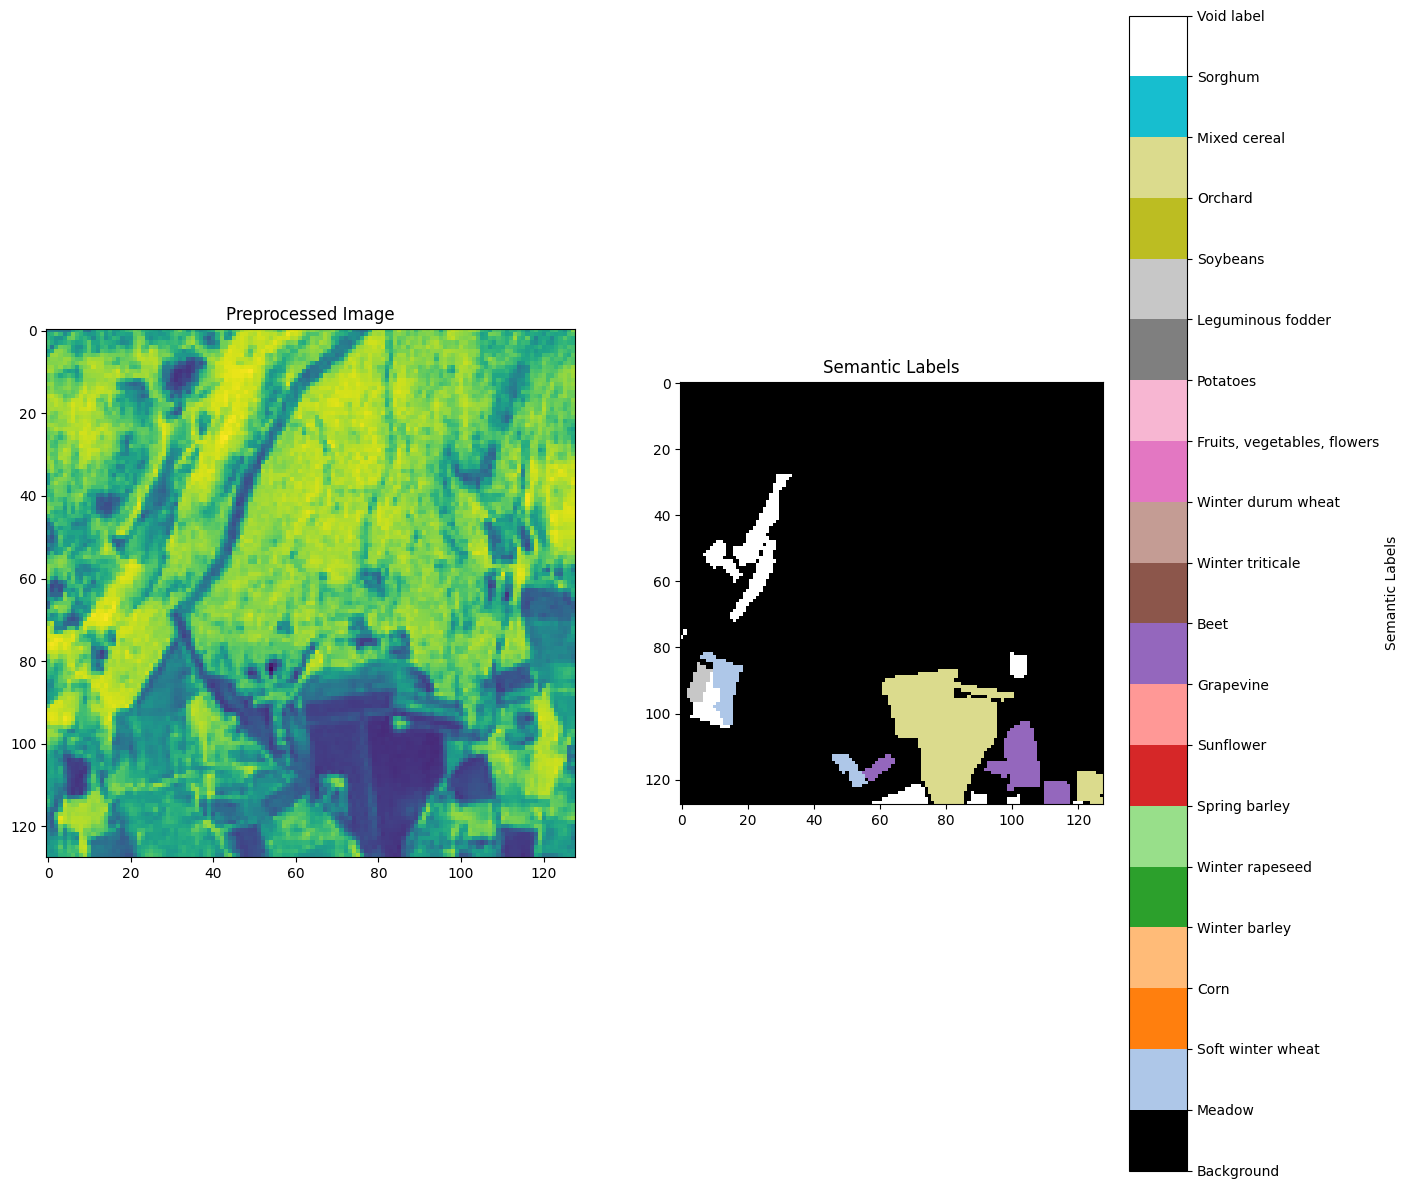

In [5]:
PATH = '/home/narvjes/data/PASTIS/SAMed'

preprocessed_image = np.load(os.path.join(PATH, f'S2_{patch_id}.npz'))

plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(preprocessed_image['image'])
plt.title('Preprocessed Image')
plt.subplot(122)
plt.imshow(preprocessed_image['label'], cmap=custom_cmap, norm=boundary_norm)
cbar = plt.colorbar(
    ticks=boundaries,
    label='Semantic Labels',
)
cbar.ax.set_yticklabels([crop for crop, _ in colours])
plt.title('Semantic Labels')
plt.show()

# Reading the Output of the Model

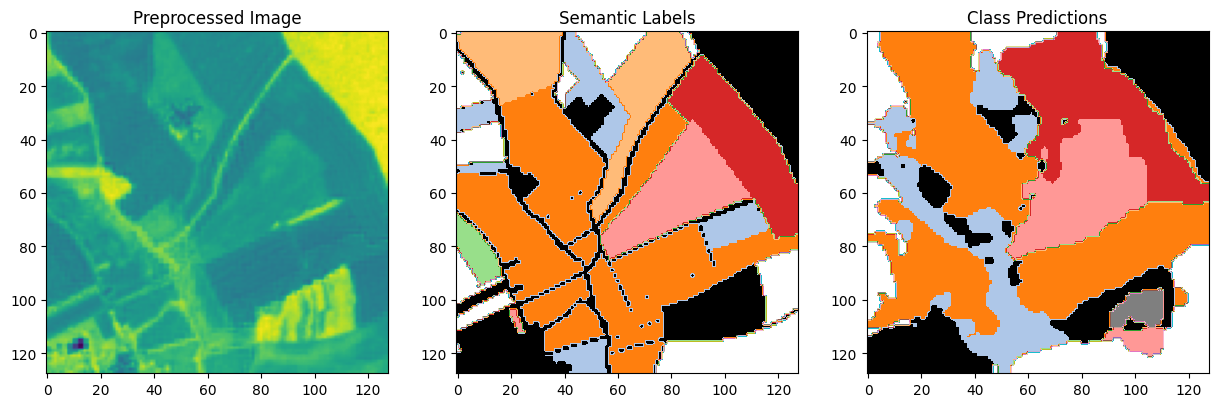

In [6]:
PATH = '/home/narvjes/repos/SAMed-jnar/output/test/predictions'
IMAGE_INPUT = 'S2_40420'

# Load the images
img = np.load(f'{os.path.join(PATH, IMAGE_INPUT)}_img.npy')
label = np.load(f'{os.path.join(PATH, IMAGE_INPUT)}_lab.npy')
try:
    pred = np.load(f'{os.path.join(PATH, IMAGE_INPUT)}_pred.npy')
except:
    pass

# Plot the original image, labels, and prediction from the model
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 15)
ax[0].imshow(img)
ax[0].set_title('Preprocessed Image')
ax[1].imshow(label, cmap=custom_cmap)
ax[1].set_title('Semantic Labels')
try:
    ax[2].imshow(pred, cmap=custom_cmap)
    ax[2].set_title('Class Predictions')
except:
    pass
plt.show()

In [8]:
label.max()

19.0

In [9]:
label.min()

0.0

In [6]:
np.unique(pred)

array([ 0., 19.], dtype=float32)